In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

In [5]:
foldername = r'/home/data_transfer/data_from_windows/20190620/Bead1/Gravity/'
BDFs = load_dir(foldername, file_prefix='Data')

41  files in folder
41  files loaded


In [9]:
foldername = r'/home/data_transfer/data_from_windows/20190624/Bead2/Discharge/'
BDFs_discharge = load_dir(foldername, file_prefix='Discharge')

107  files in folder
107  files loaded


In [10]:
freq = 23
responses = [B.response_at_freq2('x',drive_freq=freq) for B in BDFs]
responses2 = [B.response_at_freq2('y',drive_freq=freq) for B in BDFs]
responses3 = [B.response_at_freq2('y',drive_freq=freq+2) for B in BDFs]
responses4 = [B.response_at_freq3('y',drive_freq=freq) for B in BDFs]

freq1 = 23
responses_dis = [B.response_at_freq2('x',drive_freq=freq1) for B in BDFs_discharge]
responses2_dis = [B.response_at_freq2('y',drive_freq=freq1) for B in BDFs_discharge]
responses3_dis = [B.response_at_freq3('y',drive_freq=freq1) for B in BDFs_discharge]

<IPython.core.display.Javascript object>


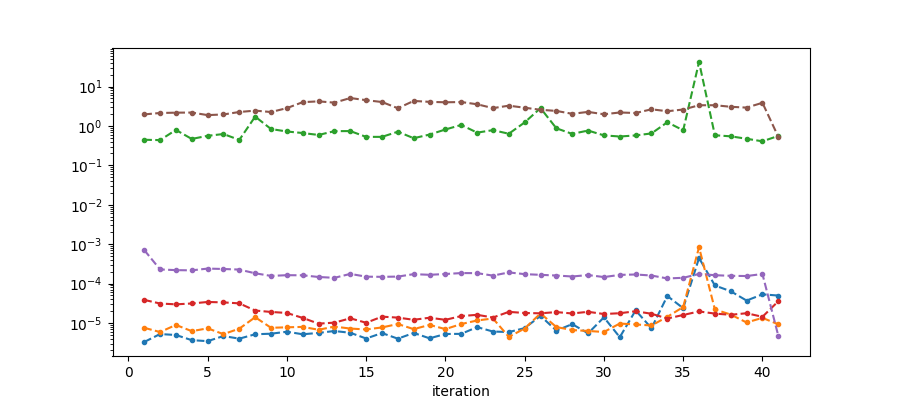

[Text(0.5, 0, 'iteration')]

In [13]:
_,ax = plt.subplots(figsize=(9,4))
rr = [np.std(resp_) for resp_ in responses]
rr2 = [np.std(resp_) for resp_ in responses2]
rr3 = [np.std(resp_) for resp_ in responses3]
rr4 = [np.std(resp_) for resp_ in responses4]

rr_dis = [np.std(resp_) for resp_ in responses_dis]
rr2_dis = [np.std(resp_) for resp_ in responses2_dis]
rr3_dis = [np.std(resp_) for resp_ in responses3_dis]

ax.semilogy(range(1,1+len(rr)),rr, '.--',label='X-axis')
ax.semilogy(range(1,1+len(rr2)),rr2,'.--', label='Y-axis')
ax.semilogy(range(1,1+len(rr4)),rr4,'.--', label='Y-axis phase')

ax.semilogy(range(1,1+len(rr)),rr_dis[-41:], '.--',label='X-axis discharge')
ax.semilogy(range(1,1+len(rr2)),rr2_dis[-41:],'.--', label='Y-axis discharge')
ax.semilogy(range(1,1+len(rr2)),rr3_dis[-41:],'.--', label='Y-axis discharge phase')

#ax.semilogy(range(1,1+len(rr3)),rr3, '.--', label='Y-NOISE')

ax.set(xlabel='iteration')
#ax.legend()

<IPython.core.display.Javascript object>


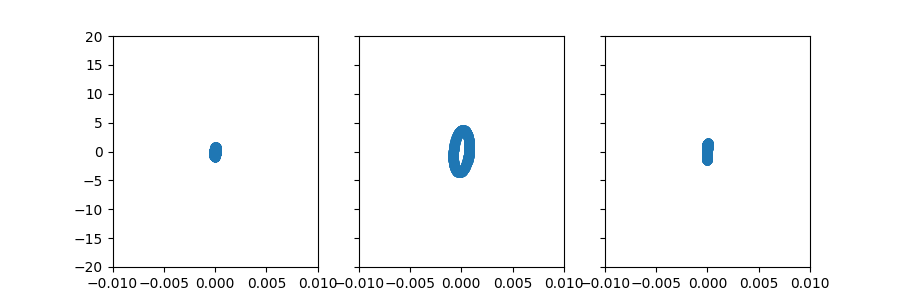

In [149]:
freq = 11
responses = [B.response_at_freq2('y',drive_freq=freq)/0.1 for B in BDFs]
responses2 = [B.response_at_freq2('y',drive_freq=freq+2) for B in BDFs]
responses3 = [B.response_at_freq3('y',drive_freq=freq+2) for B in BDFs]
responses4 = [B.response_at_freq3('y',drive_freq=freq) for B in BDFs]

i = 10000
j = 10500
_,ax = plt.subplots(1,3,figsize=(9,3),sharex=True, sharey=True)
_ = ax[0].scatter(responses[6][i:j],responses4[6][i:j])
_ = ax[1].scatter(responses[7][i:j],responses4[7][i:j])
_ = ax[2].scatter(responses2[7][i:j],responses3[7][i:j])
_ = [a.set(ylim=(-20,20),xlim=(-0.01,0.01)) for a in ax]

<IPython.core.display.Javascript object>


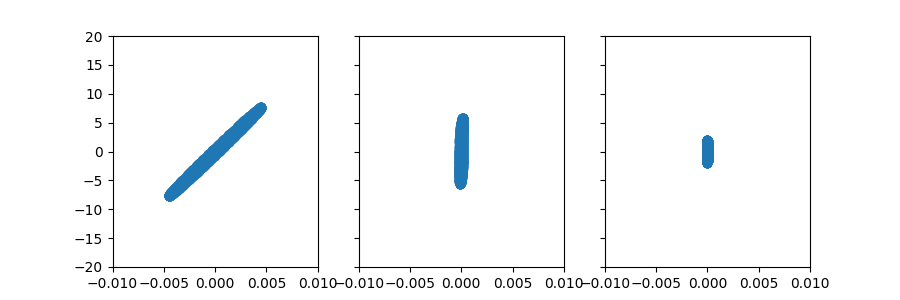

In [157]:
freq = 23
responses = [B.response_at_freq2('y',drive_freq=freq)/0.1 for B in BDFs_discharge]
responses2 = [B.response_at_freq2('y',drive_freq=freq+2) for B in BDFs_discharge]
responses3 = [B.response_at_freq3('y',drive_freq=freq+2) for B in BDFs_discharge]
responses4 = [B.response_at_freq3('y',drive_freq=freq) for B in BDFs_discharge]

i = 25000
j = 25500
_,ax = plt.subplots(1,3,figsize=(9,3),sharex=True, sharey=True)
_ = ax[0].scatter(responses[6][i:j],responses4[6][i:j])
_ = ax[1].scatter(responses[7][i:j],responses4[7][i:j])
_ = ax[2].scatter(responses2[7][i:j],responses3[7][i:j])
_ = [a.set(ylim=(-20,20),xlim=(-0.01,0.01)) for a in ax]